In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Task 1  Data Exploration

 1. Load the dataset into your preferred data analysis tool (e.g., Python, R, Excel).

In [2]:
data = pd.read_csv('Raw_data.csv',low_memory=False)

data.head()



,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         28027 non-null  object 
 1   user                        28027 non-null  object 
 2   chatStatus                  19515 non-null  object 
 3   guru                        28027 non-null  object 
 4   guruName                    28027 non-null  object 
 5   gid                         28027 non-null  int64  
 6   uid                         28027 non-null  int64  
 7   consultationType            28027 non-null  object 
 8   website                     28027 non-null  object 
 9   refundStatus                28027 non-null  object 
 10  isWhiteListUser             28027 non-null  bool   
 11  chatSeconds                 19514 non-null  float64
 12  queue                       28027 non-null  bool   
 13  freeCall                    280

In [4]:
data.describe()


,gid,uid,chatSeconds,__v,timeDuration,amount,astrologerOnCallDuration,astrologersEarnings,netAmount,userOnCallDuration,callSeconds
count,28027.000000,28027.000000,19514.000000,28027.000000,21398.000000,9016.000000,8365.000000,9016.000000,9016.000000,8365.000000,2.000000
mean,220.890498,34846.342812,349.158553,0.000178,1.977168,23.742890,128.791871,10.996736,23.734174,118.784818,33000.000000
std,86.575346,7812.317551,319.588213,0.013356,3.340467,87.134998,245.204088,42.141543,87.134775,244.536228,38183.766184
min,8.000000,1.000000,300.000000,0.000000,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000
25%,195.000000,31659.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19500.000000
50%,255.000000,36213.000000,300.000000,0.000000,0.100000,0.000000,34.000000,0.000000,0.000000,8.000000,33000.000000
75%,281.000000,40109.000000,300.000000,0.000000,4.356962,0.000000,189.000000,0.000000,0.000000,180.000000,46500.000000
max,325.000000,44005.000000,7980.000000,1.000000,67.000000,1800.000000,4029.000000,900.000000,1800.000000,4020.000000,60000.000000


2. Check for missing values in the dataset and handle them appropriately

In [5]:
# Check for missing values in each column
missing_data = data.isnull().sum()
missing_data


_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus        

### Exploring Each Columns

### `Chatstatus`

In [6]:
data.chatStatus.unique()

array(['incomplete', 'failed', nan, 'completed', 'pending', 'started'],
      dtype=object)

In [7]:
print("Total number of records:", len(data))
print("Number of missing values in chatStatus:", data['chatStatus'].isnull().sum())
print("Percentage of missing values in chatStatus: {:.2f}%".format(data['chatStatus'].isnull().sum() / len(data) * 100))


chat_status_counts = data['chatStatus'].value_counts(dropna=False)
chat_status_percentages = data['chatStatus'].value_counts(dropna=False, normalize=True) * 100


chat_status_analysis = pd.DataFrame({
    'Count': chat_status_counts,
    'Percentage': chat_status_percentages
})

print("\nDetailed breakdown of chatStatus values:")
print(chat_status_analysis)


Total number of records: 28027
Number of missing values in chatStatus: 8512
Percentage of missing values in chatStatus: 30.37%

Detailed breakdown of chatStatus values:
            Count  Percentage
chatStatus                   
NaN          8512   30.370714
failed       7256   25.889321
incomplete   6641   23.695008
completed    5535   19.748814
pending        48    0.171263
started        35    0.124880


The missing values in `chatStatus` are of Nan value which symbolises the status of the chat is not known

Which Means it has 2 conditions --

* The chat is not in the database
* The chat is not known

Since the chat is not in the database, we can replace the NaN with 'NOTKNOWN'


In [8]:
# Replacing NaN values in chatStatus with 'NOTKNOWN'

data['chatStatus'] = data['chatStatus'].fillna('NOTKNOWN')


In [9]:
data.chatStatus.unique()


array(['incomplete', 'failed', 'NOTKNOWN', 'completed', 'pending',
       'started'], dtype=object)

### Handling Missing Values in `chatSeconds`



In [10]:
data.chatSeconds.unique()


array([ 300.,   nan,  420.,  360.,  600.,  660.,  480.,  540., 3840.,
       7980., 7920.,  720., 1140., 1440., 1500.,  900., 3180., 3120.,
       2580., 1080., 2880., 3540., 1020., 1260., 1380., 2400., 1680.,
       1200.,  960.,  780., 2940., 1560.,  840., 1620., 1320., 2700.,
       4080., 3300., 1920., 1860., 1740., 3660., 1980., 1800., 2040.,
       2220., 2280., 4500., 4380., 2460., 7740., 7500., 3900., 6660.,
       3000.])

#### Undertsanding the patterns in rows with NaN chatSeconds

In [11]:
print("Rows with NaN chatSeconds but valid start/end times:")
mask = (data['chatSeconds'].isna() & 
        data['chatStartTime'].notna() & 
        data['chatEndTime'].notna())


print(data[mask][['chatStatus', 'chatStartTime', 'chatEndTime', 'timeDuration']].head())



Rows with NaN chatSeconds but valid start/end times:
Empty DataFrame
Columns: [chatStatus, chatStartTime, chatEndTime, timeDuration]
Index: []


### Analyzing relationship between chatStatus and chatSeconds

##### Let's examine:
* 1. Average chatSeconds for each chatStatus
* 2. Distribution of chatSeconds across different chatStatus
* 3. Presence of NaN values in chatSeconds for each chatStatus

Since the chatSeconds has 8513 and chatstatus jad 8512 NAN Values, there could be a relationship between chatStatus and chatSeconds


In [12]:
# Calculating average chatSeconds for each chatStatus

print("Average chatSeconds by chatStatus:")
avg_by_status = data.groupby('chatStatus')['chatSeconds'].mean()
avg_by_status



Average chatSeconds by chatStatus:


chatStatus
NOTKNOWN             NaN
completed     339.837398
failed        353.714680
incomplete    352.356573
pending       321.250000
started       310.285714
Name: chatSeconds, dtype: float64

In [13]:
# Calculating  median chatSeconds for each chatStatus (less sensitive to outliers than mean)

print("\nMedian chatSeconds by chatStatus:")

median_by_status = data.groupby('chatStatus')['chatSeconds'].median()
median_by_status




Median chatSeconds by chatStatus:


chatStatus
NOTKNOWN        NaN
completed     300.0
failed        300.0
incomplete    300.0
pending       300.0
started       300.0
Name: chatSeconds, dtype: float64

In [14]:
print("\nCount of records by chatStatus:")
status_counts = data['chatStatus'].value_counts()
status_counts



Count of records by chatStatus:


chatStatus
NOTKNOWN      8512
failed        7256
incomplete    6641
completed     5535
pending         48
started         35
Name: count, dtype: int64

In [15]:
# Calculating percentage of NaN chatSeconds for each chatStatus

print("\nPercentage of NaN chatSeconds by chatStatus:")

nan_pct_by_status = data.groupby('chatStatus')['chatSeconds'].apply(lambda x: x.isna().mean() * 100)
nan_pct_by_status



Percentage of NaN chatSeconds by chatStatus:


chatStatus
NOTKNOWN      100.000000
completed       0.000000
failed          0.013782
incomplete      0.000000
pending         0.000000
started         0.000000
Name: chatSeconds, dtype: float64

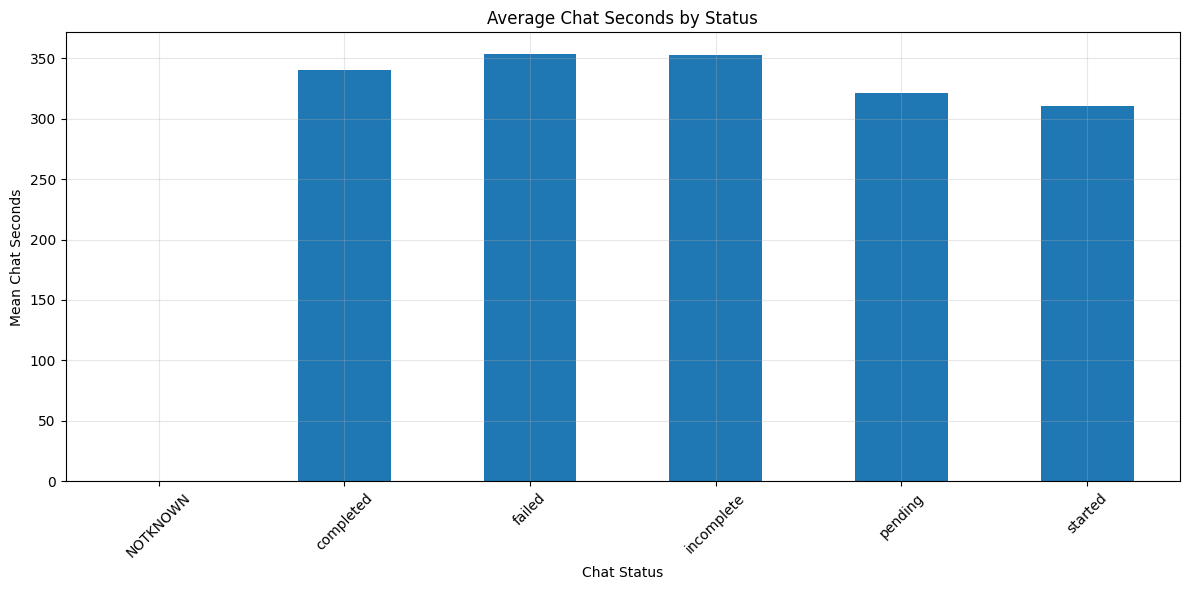

In [16]:
plt.figure(figsize=(12,6))
avg_by_status.plot(kind='bar')
plt.title('Average Chat Seconds by Status')
plt.xlabel('Chat Status')
plt.ylabel('Mean Chat Seconds')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Its clear from the above calculation on Avg, Mean & Count Percentage of NaN values in chatSeconds & ChatStatus,
#### The chatStatus has a relationship with the chatSeconds   
- Every NaN Value in chatSeconds has a chatStatus of 'NOTKNOWN'


In [17]:
# checking chatseconds for chatStatus NOTKNOWN

notknown_mask = data['chatStatus'] == 'NOTKNOWN'
total_notknown = notknown_mask.sum()





In [18]:
empty_stats = {
    'chatStartTime': data[notknown_mask]['chatStartTime'].isna().sum(),
    'chatEndTime': data[notknown_mask]['chatEndTime'].isna().sum(),
    'timeDuration': data[notknown_mask]['timeDuration'].isna().sum()
}

print(f"\nFor chatStatus = NOTKNOWN (total rows: {total_notknown}):")
for field, empty_count in empty_stats.items():
    print(f"{field}:")
    print(f"Empty rows: {empty_count}")
    print(f"Percentage empty: {(empty_count/total_notknown*100):.1f}%")



For chatStatus = NOTKNOWN (total rows: 8512):
chatStartTime:
Empty rows: 8512
Percentage empty: 100.0%
chatEndTime:
Empty rows: 8512
Percentage empty: 100.0%
timeDuration:
Empty rows: 146
Percentage empty: 1.7%


From the above analysis, we can see that when the ChatStatus is NOTKNOWN, No chats had been done.
* Which clearly means for chatstatus = NOTKNOWN, "no chat had been done". or the data is not available for that chat.


In [19]:

data['chatStartTime'] = pd.to_datetime(data['chatStartTime'], errors='coerce')
data['chatEndTime'] = pd.to_datetime(data['chatEndTime'], errors='coerce')


data.loc[data['chatSeconds'].isna(), 'chatSeconds'] = (data['chatEndTime'] - data['chatStartTime']).dt.total_seconds()

In [20]:
data.chatSeconds.isna().sum()

np.int64(8513)

#### From above 2 cells It is clear that for ChatSeconds = NaN there is no record for chatend and chatstart hence we can't clearly calculate the chatduration 

- We Assuming the `chatSeconds` for NaN = ZERO

In [21]:

data['chatSeconds'] = data['chatSeconds'].fillna(0)


In [22]:
data.chatSeconds.isna().sum()

np.int64(0)

### Handling `timeduration`

In [23]:
data.timeDuration.isna().sum()



np.int64(6629)

In [24]:

data.loc[data['timeDuration'].isna(), 'timeDuration'] = (data['chatEndTime'] - data['chatStartTime']).dt.total_seconds() / 3600


In [25]:
data.timeDuration.isna().sum()

np.int64(6629)

In [26]:

print("Total missing timeDuration values:", data.timeDuration.isna().sum())

print(data[data.timeDuration.isna()][['chatStartTime', 'chatEndTime', 'chatSeconds', 'timeDuration']].head())

print("\nChat status distribution for missing timeDuration:")
print(data[data.timeDuration.isna()].chatStatus.value_counts())


Total missing timeDuration values: 6629
   chatStartTime chatEndTime  chatSeconds  timeDuration
4            NaT         NaT        300.0           NaN
18           NaT         NaT        300.0           NaN
20           NaT         NaT        300.0           NaN
31           NaT         NaT        300.0           NaN
35           NaT         NaT        300.0           NaN

Chat status distribution for missing timeDuration:
chatStatus
failed      6433
NOTKNOWN     146
pending       48
started        2
Name: count, dtype: int64


From the above analysis we can see that we have chatSeconds = 300 for some time Duartion NaN 

Which have following possibilties:

* Each user had assigned 300 seconds of chatting duration.
* The chat got Failed before starting
   - Since we have 6433 Trasactions which got failed hence it is prooving the above assumptions


In [27]:
data['timeDuration'] = data['timeDuration'].fillna(0)

In [28]:
data.timeDuration.isna().sum()

np.int64(0)

### Handling `statementEntryId`

In [29]:
data.statementEntryId.unique()

array(['656922f3919324acb6e8713b', '65692413919324acb6e87443',
       '65692612919324acb6e8773a', ..., '6595f23d849de2bb564ee1cc',
       '6595f385883c1bbae79c58e5', '6595f407883c1bbae79c6e13'],
      shape=(27877,), dtype=object)

In [30]:
data.statementEntryId.isna().sum()






np.int64(151)

In [31]:

print("\nChat status distribution for missing statementEntryId:")
print(data[data.statementEntryId.isna()].chatStatus.value_counts())




Chat status distribution for missing statementEntryId:
chatStatus
NOTKNOWN    151
Name: count, dtype: int64


From the above oberservations we can see that `statementEntryId` is Missing for `ChatStatus` = NOTKNOWN which is probably due to data not present

In [32]:
data['statementEntryId'] = data['statementEntryId'].fillna(0)


#### Handling `chatStartTime` and `chatEndTime`

In [155]:
print("\nMissing values:")
print("chatStartTime missing:", data['chatStartTime'].isna().sum())
print("chatEndTime missing:", data['chatEndTime'].isna().sum())





Missing values:
chatStartTime missing: 3127
chatEndTime missing: 50


In [156]:

print("\nBasic statistics:")
print("\nchatStartTime:")
print(data['chatStartTime'].describe())
print("\nchatEndTime:") 
print(data['chatEndTime'].describe())



Basic statistics:

chatStartTime:
count     24900
unique     9133
top           0
freq      15768
Name: chatStartTime, dtype: int64

chatEndTime:
count     27977
unique    12210
top           0
freq      15768
Name: chatEndTime, dtype: int64


In [157]:

valid_times = data[['chatStartTime', 'chatEndTime']].notna().all(axis=1)
invalid_sequence = data[valid_times & (data['chatStartTime'] > data['chatEndTime'])]
print("\nNumber of chats where end time is before start time:", len(invalid_sequence))




Number of chats where end time is before start time: 34


In [158]:
valid_duration = data[valid_times & (data['chatEndTime'] >= data['chatStartTime'])]
duration = valid_duration['chatEndTime'] - valid_duration['chatStartTime']
print("\nChat duration statistics (in seconds):")
print(duration.describe())


Chat duration statistics (in seconds):
count     24864
unique     6443
top           0
freq      15768
dtype: int64


In [159]:
# Calculating percentage of missing values
total_records = len(data)
pct_missing_start = (data['chatStartTime'].isna().sum() / total_records) * 100
pct_missing_end = (data['chatEndTime'].isna().sum() / total_records) * 100

print("\nPercentage of missing values:")
print(f"chatStartTime: {pct_missing_start:.2f}%")
print(f"chatEndTime: {pct_missing_end:.2f}%")





Percentage of missing values:
chatStartTime: 11.16%
chatEndTime: 0.18%


In [161]:
# Analyze if missing values occur together
both_missing = data[data['chatStartTime'].isna() & data['chatEndTime'].isna()]
only_start_missing = data[data['chatStartTime'].isna() & ~data['chatEndTime'].isna()]
only_end_missing = data[~data['chatStartTime'].isna() & data['chatEndTime'].isna()]

print("\nMissing value patterns:")
print(f"Records with both timestamps missing: {len(both_missing)}")
print(f"Records with only start time missing: {len(only_start_missing)}")
print(f"Records with only end time missing: {len(only_end_missing)}")




Missing value patterns:
Records with both timestamps missing: 48
Records with only start time missing: 3079
Records with only end time missing: 2


In [162]:
print("\nMissing timestamps by chat status:")
missing_by_status = data[data['chatStartTime'].isna() | data['chatEndTime'].isna()].groupby('chatStatus').size()
print(missing_by_status)




Missing timestamps by chat status:
chatStatus
incomplete    3079
pending         48
started          2
dtype: int64


* For `ChatStatus` = NOTKNOWN and Failed we have considered it as ZERO for both `chatstartTime` and `ChatendTime`

In [164]:
# Setting chatStartTime and chatEndTime to 0 for chats with status 'NOTKNOWN' or 'failed'
data.loc[data['chatStatus'].isin(['NOTKNOWN', 'failed']), ['chatStartTime', 'chatEndTime']] = 0


In [36]:
print("chatStartTime missing:", data['chatStartTime'].isna().sum())
print("chatEndTime missing:", data['chatEndTime'].isna().sum())

chatStartTime missing: 3127
chatEndTime missing: 50


For Chatstatus = Incomplete we are calcuating the time

In [37]:
data.userOnCallDuration.isna().sum()


np.int64(19662)

 3. Provide summary statistics for key numeric columns (e.g., Charge, TalkTime).

In [61]:
print("\nMissing userOnCallDuration by chat status:")
missing_call_duration = data[data['userOnCallDuration'].isna()].groupby('chatStatus').size()
print(missing_call_duration)


print("\nPercentage of missing userOnCallDuration within each chat status:")
missing_call_duration_pct = (data[data['userOnCallDuration'].isna()].groupby('chatStatus').size() / 
                           data.groupby('chatStatus').size() * 100)
print(missing_call_duration_pct)


print("\nTotal missing userOnCallDuration values:", data['userOnCallDuration'].isna().sum())
print("Percentage of missing userOnCallDuration:", 
      (data['userOnCallDuration'].isna().sum() / len(data) * 100).round(2), "%")




Missing userOnCallDuration by chat status:
chatStatus
NOTKNOWN       148
completed     5535
failed        7255
incomplete    6641
pending         48
started         35
dtype: int64

Percentage of missing userOnCallDuration within each chat status:
chatStatus
NOTKNOWN        1.738722
completed     100.000000
failed         99.986218
incomplete    100.000000
pending       100.000000
started       100.000000
dtype: float64

Total missing userOnCallDuration values: 19662
Percentage of missing userOnCallDuration: 70.15 %


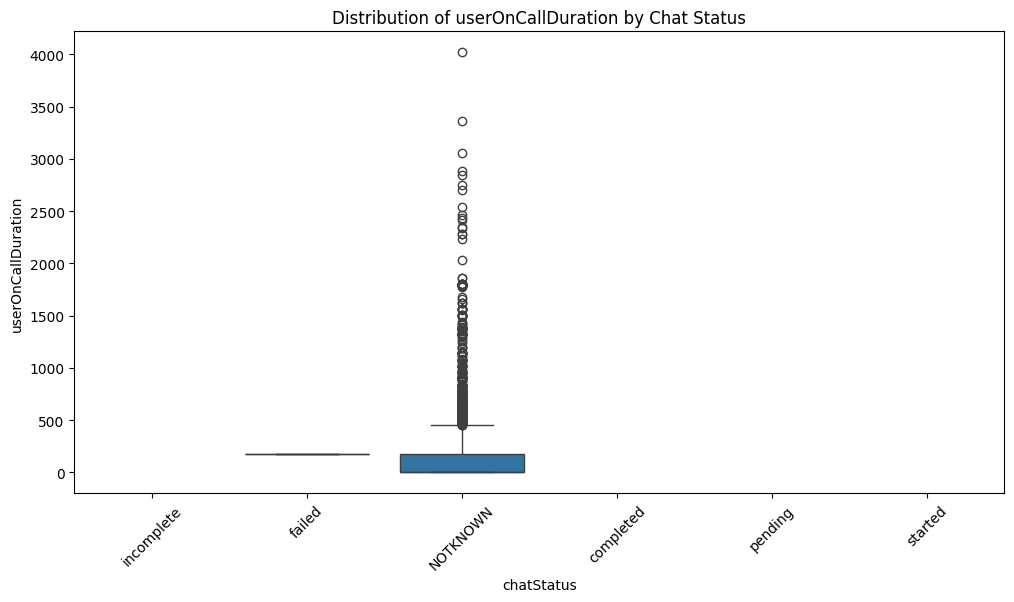

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='chatStatus', y='userOnCallDuration', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of userOnCallDuration by Chat Status')
plt.show()


In [39]:
data.userOnCallDuration.isna().sum()

np.int64(19662)

4.Visualize the distribution of call charges using a histogram

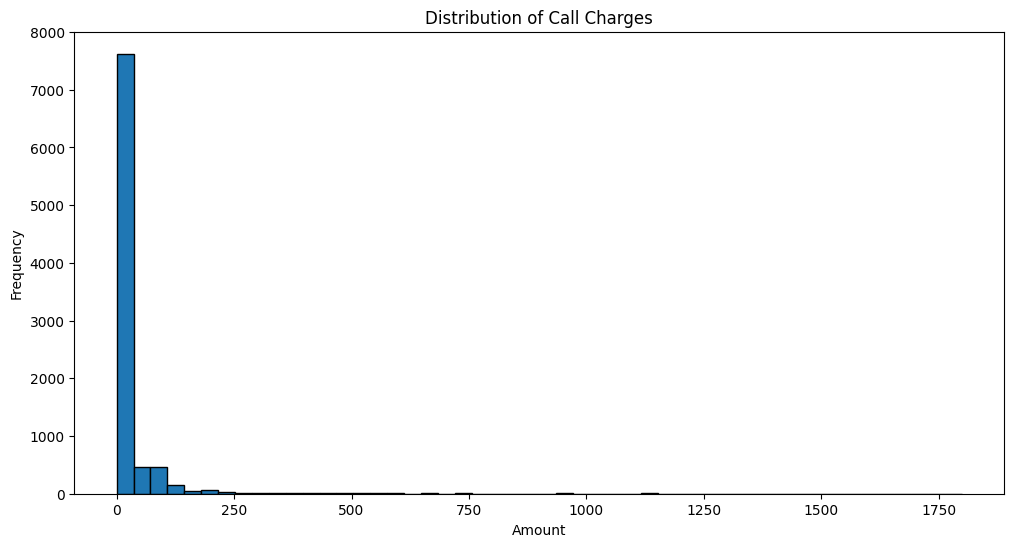

In [67]:
plt.figure(figsize=(12, 6))
plt.hist(data['amount'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Call Charges')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()




## Identifying Key Numeric Coloumns

In [40]:
key_numeric_columns = [
    'chatSeconds',      
    'timeDuration',    
    'amount',          
    'astrologerOnCallDuration',  
    'astrologersEarnings',       
    'netAmount',                
    'userOnCallDuration'        
]


In [41]:
summary_stats = data[key_numeric_columns].describe()

In [42]:
data.astrologersEarnings.describe()

count    9016.000000
mean       10.996736
std        42.141543
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       900.000000
Name: astrologersEarnings, dtype: float64

In [43]:
print("\nSummary Statistics for Key Metrics:")
print(summary_stats)


Summary Statistics for Key Metrics:
       chatSeconds  timeDuration       amount  astrologerOnCallDuration  \
count  28027.00000  28027.000000  9016.000000               8365.000000   
mean     243.10415      1.509525    23.742890                128.791871   
std      311.28032      3.037316    87.134998                245.204088   
min        0.00000     -0.166667     0.000000                  0.000000   
25%        0.00000      0.000000     0.000000                  0.000000   
50%      300.00000      0.000000     0.000000                 34.000000   
75%      300.00000      3.000000     0.000000                189.000000   
max     7980.00000     67.000000  1800.000000               4029.000000   

       astrologersEarnings    netAmount  userOnCallDuration  
count          9016.000000  9016.000000         8365.000000  
mean             10.996736    23.734174          118.784818  
std              42.141543    87.134775          244.536228  
min               0.000000     0.000000

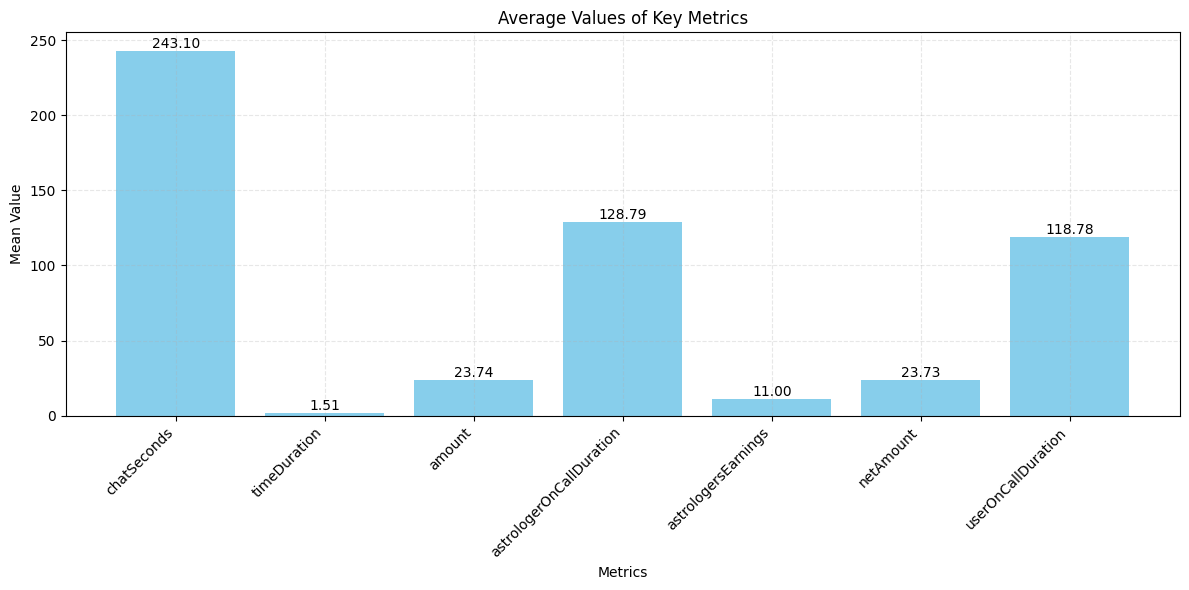

In [165]:


plt.figure(figsize=(12, 6))
means = data[key_numeric_columns].mean()

plt.bar(range(len(means)), means, color='skyblue')

plt.title('Average Values of Key Metrics', fontsize=12)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')

plt.xticks(range(len(means)), key_numeric_columns, rotation=45, ha='right')

for i, v in enumerate(means):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()





plt.show()





## Top Performing Astrologers Analysis



In [45]:

guru_performance = data.groupby(['guru', 'guruName']).agg({
    'chatSeconds': ['count', 'mean'],  
    'astrologersEarnings': 'sum',     
    'amount': 'mean',                  
    'chatStatus': lambda x: (x == 'completed').mean() * 100   # Considering only the completed chats
}).round(2)



In [46]:

guru_performance.columns = [
    'Total_Consultations', 
    'Avg_Duration_Seconds',
    'Total_Earnings',
    'Avg_Amount',
    'Completion_Rate_%'
]

guru_performance = guru_performance.reset_index()





In [47]:
top_performers = guru_performance.sort_values('Total_Earnings', ascending=False).head(10)


In [48]:
top_performers.head(10)

,guru,guruName,Total_Consultations,Avg_Duration_Seconds,Total_Earnings,Avg_Amount,Completion_Rate_%
9,65054782f5f203225bfcdc70,Dr Balkrisna,687,165.76,15910.21,115.55,11.35
23,65054784f5f203225bfcdcd4,Astro Ruchi,777,211.35,10274.66,41.22,42.99
93,65489f0807bc1e26099117f8,Astro Shalini,1321,76.53,6807.61,26.44,6.43
94,6548ab2907bc1e26099a8c1d,Astro Divya,1056,258.58,3696.99,20.11,28.79
102,655f2b83f9e3a0877f961727,Astro Sonam S,752,253.72,2907.49,19.61,34.97
0,65053ccd03c045565cf76ff0,Usha Siingh,200,156.00,2870.27,164.02,3.50
122,656a76a964aaf999f4d17b6e,Astro Seema,605,253.09,2690.82,23.00,25.95
128,656e09e32d32774bedc8a14d,Tarot Ari,336,214.82,2222.56,27.29,29.76
98,654957a81a642edaf98c6c9c,Tarot Rupika,567,214.92,2198.75,28.04,12.17
31,65054785f5f203225bfcdcf8,Tarot Bee Riya,743,226.19,2178.71,60.56,2.42


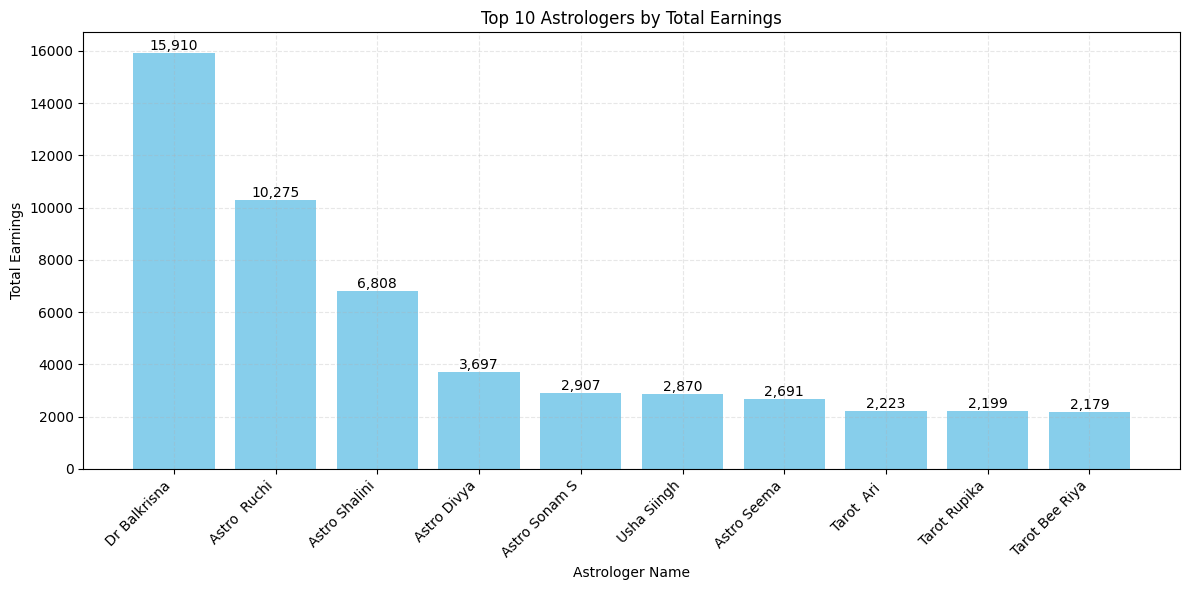

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_performers)), top_performers['Total_Earnings'], color='skyblue')
plt.title('Top 10 Astrologers by Total Earnings', fontsize=12)
plt.xlabel('Astrologer Name')
plt.ylabel('Total Earnings')

plt.xticks(range(len(top_performers)), top_performers['guruName'], rotation=45, ha='right')


for i, v in enumerate(top_performers['Total_Earnings']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Task 2: Call Center Performance Metrics

##### Since the activity coloumn is not present:
5. Calculate the average TalkTime for different call activities (Activity column)


Assumptions: My analysis instead uses `chatStatus` as a proxy for activity levels,

In [50]:
chat_talk_time = data.groupby('chatStatus')['chatSeconds'].agg(['mean', 'count']).round(2)
chat_talk_time = chat_talk_time.sort_values('mean', ascending=False)



In [51]:

print("\nAverage Talk Time by Chat Status:")
print("================================")
print(chat_talk_time)




Average Talk Time by Chat Status:
              mean  count
chatStatus               
failed      353.67   7256
incomplete  352.36   6641
completed   339.84   5535
pending     321.25     48
started     310.29     35
NOTKNOWN      0.00   8512


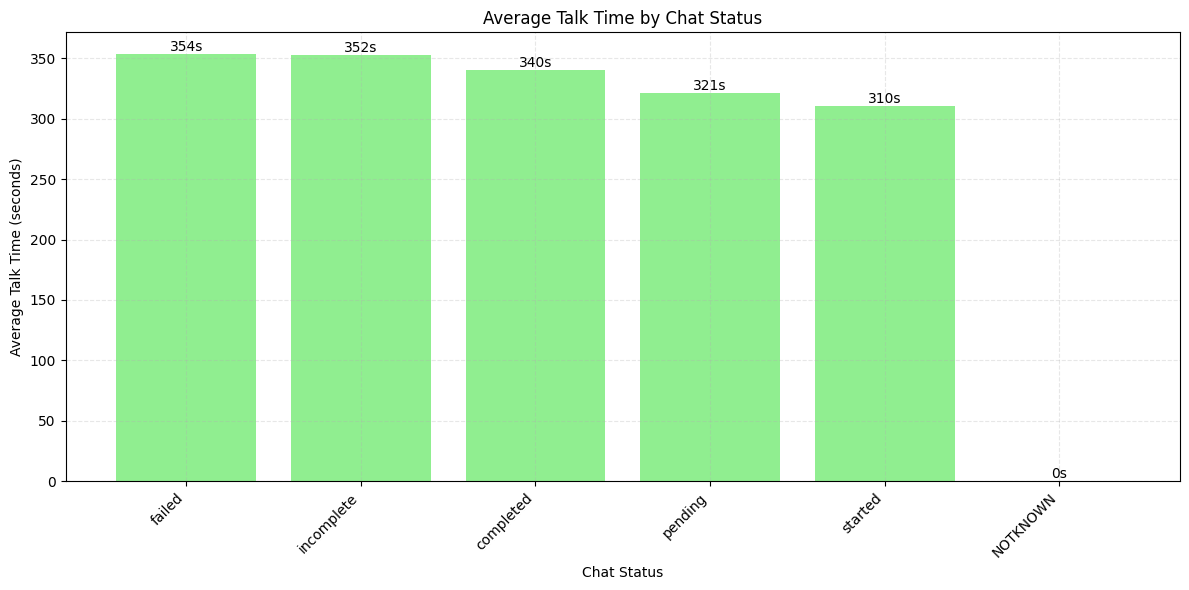

In [52]:

plt.figure(figsize=(12, 6))
plt.bar(range(len(chat_talk_time)), chat_talk_time['mean'], color='lightgreen')
plt.title('Average Talk Time by Chat Status', fontsize=12)
plt.xlabel('Chat Status')
plt.ylabel('Average Talk Time (seconds)')

plt.xticks(range(len(chat_talk_time)), chat_talk_time.index, rotation=45, ha='right')


for i, v in enumerate(chat_talk_time['mean']):
    plt.text(i, v, f'{v:,.0f}s', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


6. Determine the most common source of calls (Source column)

In [53]:
data.source.unique()

array([nan, 'Production', 'Test'], dtype=object)

In [54]:
source_counts = data['source'].value_counts()
print("\nMost Common Sources of Calls:")
print("============================")
source_counts.head()





Most Common Sources of Calls:


source
Production    16256
Test             35
Name: count, dtype: int64

7 .Calculating the Earning and Spending of Users and Maters

In [55]:
total_master_earnings = data['astrologersEarnings'].sum()

total_user_spending = data['amount'].sum()




 7. Calculate the total earnings and spending for both users and masters.

In [56]:
print("\nFinancial Summary:")
print("=================")
print(f"Total Master Earnings: ₹{total_master_earnings:,.2f}")
print(f"Total User Spending: ₹{total_user_spending:,.2f}")




Financial Summary:
Total Master Earnings: ₹99,146.57
Total User Spending: ₹214,065.90


In [57]:
# CALCULATING AVGs
num_consultations = len(data)
avg_master_earnings = total_master_earnings / num_consultations
avg_user_spending = total_user_spending / num_consultations

print(f"\nPer Consultation Averages:")
print(f"Average Master Earnings: ₹{avg_master_earnings:.2f}")
print(f"Average User Spending: ₹{avg_user_spending:.2f}")   


Per Consultation Averages:
Average Master Earnings: ₹3.54
Average User Spending: ₹7.64


 8. Analyze the relationship between TalkTime and Charge.

#### Correlation Analysis
- We are calculating correlation to understand the strength and direction of relationship between talk time and charges

- The formula for Pearson correlation coefficient (r) is:
### r = Σ((x - x̄)(y - ȳ)) / √(Σ(x - x̄)²)(Σ(y - ȳ)²)
- where:
- x, y are the variables
- x̄, ȳ are the means of x and y
- Σ represents summation


In [68]:
print("\nTalk Time vs Charges:")
print("==========================================")

correlation = data['chatSeconds'].corr(data['amount'])
print(f"\nCorrelation coefficient between talk time and charges: {correlation:.3f}")




Talk Time vs Charges:

Correlation coefficient between talk time and charges: -0.023


- A correlation coefficient of +1 indicates perfect positive correlation
- A correlation coefficient of -1 indicates perfect negative correlation 
- A correlation coefficient of 0 indicates no correlation


Text(0.5, 1.0, 'Talk Time vs Charges')

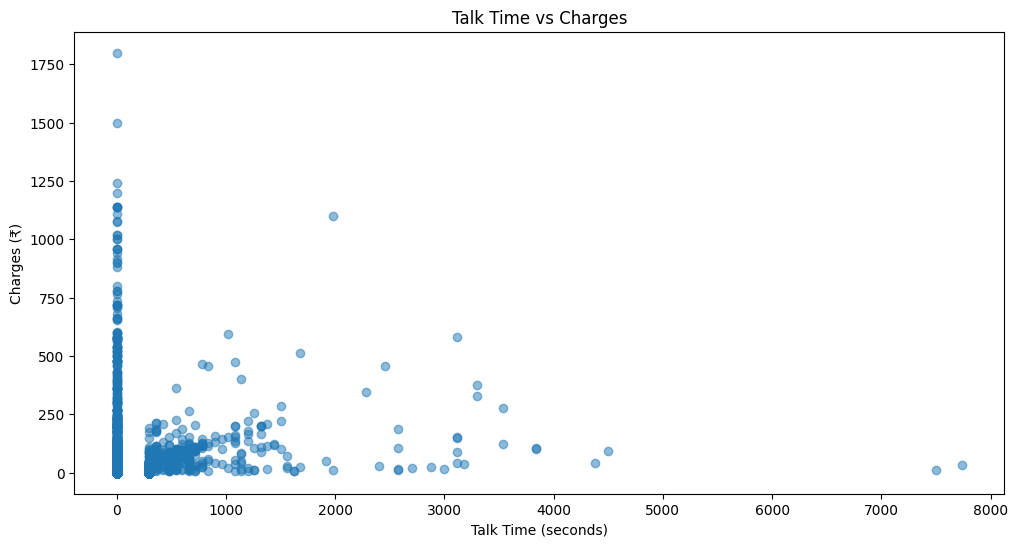

In [59]:
plt.figure(figsize=(12,6))

mask = data['chatSeconds'].notna() & data['amount'].notna()
chat_seconds = data.loc[mask, 'chatSeconds']
amounts = data.loc[mask, 'amount']

plt.scatter(chat_seconds, amounts, alpha=0.5)
plt.xlabel('Talk Time (seconds)')
plt.ylabel('Charges (₹)')
plt.title('Talk Time vs Charges')




# Task 3: Call Handling Analysis

 9. Calculate the average time it takes for calls to be connected (ConnectTime- DialTime).

Assumptions:  we don't have explicit DialTime/ConnectTime columns, we'll use:
 - chatStartTime as the connection time
 - timeDuration as actual call duration
 - chatEndTime as end time
 - createdtAT as actual user query time
 

In [72]:
print(data.columns)

Index(['_id', 'user', 'chatStatus', 'guru', 'guruName', 'gid', 'uid',
       'consultationType', 'website', 'refundStatus', 'isWhiteListUser',
       'chatSeconds', 'queue', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', '__v', 'statementEntryId', 'chatStartTime', 'chatEndTime',
       'timeDuration', 'callChannel', 'callIvrType', 'callStatus', 'CallSid',
       'amount', 'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'region', 'userCallStatus',
       'userOnCallDuration', 'RecordingUrl', 'feedback', 'hideHistory',
       'cardPosition', 'Remedies', 'offer', 'refunds[0]', 'source',
       'callSeconds', 'complementaryCallOrganiser', 'disconnectedBy'],
      dtype='object')


In [75]:
data.createdAt.head()

0    2023-12-01T00:04:02.993Z
1    2023-12-01T00:08:51.903Z
2    2023-12-01T00:17:22.270Z
3    2023-12-01T00:24:41.672Z
4    2023-12-01T00:48:53.744Z
Name: createdAt, dtype: object

In [76]:
data.chatStartTime.head()

0    2023-12-01 00:07:33.248000+00:00
1    2023-12-01 00:09:55.808000+00:00
2    2023-12-01 00:22:04.072000+00:00
3    2023-12-01 00:29:43.556000+00:00
4                                   0
Name: chatStartTime, dtype: object

In [79]:
valid_calls = data[
    (data['chatStatus'] == 'completed') & 
    (data['chatStartTime'].notna()) &
    (data['createdAt'].notna())
]


In [90]:
valid_calls = data[mask].copy()
valid_calls['createdAt'] = pd.to_datetime(valid_calls['createdAt'])
valid_calls['chatStartTime'] = pd.to_datetime(valid_calls['chatStartTime'])

In [91]:
valid_calls['connection_time'] = (valid_calls['chatStartTime'] - valid_calls['createdAt']).dt.total_seconds()

In [92]:
print(f"Average time from query to connection: {valid_calls['connection_time'].mean():.2f} seconds")
print(f"Median time from query to connection: {valid_calls['connection_time'].median():.2f} seconds")
print(f"Min time from query to connection: {valid_calls['connection_time'].min():.2f} seconds")
print(f"Max time from query to connection: {valid_calls['connection_time'].max():.2f} seconds")




Average time from query to connection: 18.44 seconds
Median time from query to connection: 13.59 seconds
Min time from query to connection: 3.77 seconds
Max time from query to connection: 3230.42 seconds


10. Identify the most common reason for call disconnection (UnconnectTime- ConnectTime).

In [96]:
data.disconnectedBy.isna().sum()

np.int64(28018)

In [97]:
data.disconnectedBy.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28027 entries, 0 to 28026
Series name: disconnectedBy
Non-Null Count  Dtype 
--------------  ----- 
9 non-null      object
dtypes: object(1)
memory usage: 219.1+ KB


Since we have only 9 Not NUll values is `disconnetedby` 

In [99]:



if 'disconnectedBy' in valid_calls.columns:
    print("\nDisconnection Reasons:")
    print(valid_calls['disconnectedBy'].value_counts())



Disconnection Reasons:
disconnectedBy
user          5
astrologer    1
Name: count, dtype: int64


 11. Analyze the HangUpTime patterns and identify any trends

In [166]:
valid_calls['call_duration'] = (valid_calls['chatEndTime'] - valid_calls['chatStartTime']).dt.total_seconds()



In [102]:
print("\nCall Duration Statistics (in seconds):")
print(f"Average call duration: {valid_calls['call_duration'].mean():.2f}")
print(f"Median call duration: {valid_calls['call_duration'].median():.2f}")
print(f"Minimum call duration: {valid_calls['call_duration'].min():.2f}")
print(f"Maximum call duration: {valid_calls['call_duration'].max():.2f}")




Call Duration Statistics (in seconds):
Average call duration: 287.42
Median call duration: 303.30
Minimum call duration: 60.10
Maximum call duration: 3184.56


In [104]:
print("\nAverage Call Duration by Chat Status:")
print(valid_calls.groupby('chatStatus')['call_duration'].mean())

valid_calls['hour_of_day'] = valid_calls['chatEndTime'].dt.hour




Average Call Duration by Chat Status:
chatStatus
completed    287.421116
Name: call_duration, dtype: float64


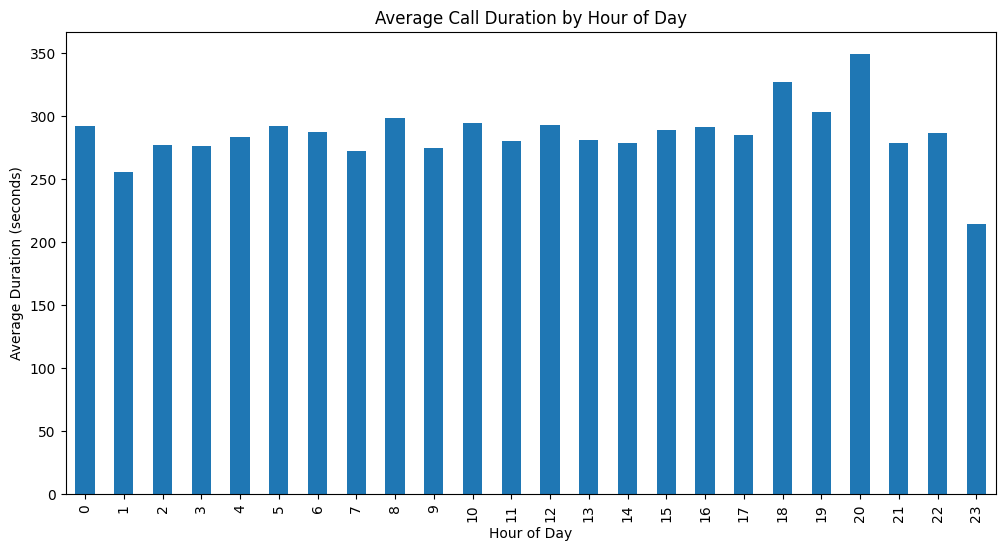

In [105]:
plt.figure(figsize=(12, 6))
valid_calls.groupby('hour_of_day')['call_duration'].mean().plot(kind='bar')
plt.title('Average Call Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (seconds)')
plt.show()

# Task 4: Order and Refund Analysis

12. Determine the order status distribution for calls.

-> There is no coloumns to find order status for the calls

In [108]:
data.columns

Index(['_id', 'user', 'chatStatus', 'guru', 'guruName', 'gid', 'uid',
       'consultationType', 'website', 'refundStatus', 'isWhiteListUser',
       'chatSeconds', 'queue', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', '__v', 'statementEntryId', 'chatStartTime', 'chatEndTime',
       'timeDuration', 'callChannel', 'callIvrType', 'callStatus', 'CallSid',
       'amount', 'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'region', 'userCallStatus',
       'userOnCallDuration', 'RecordingUrl', 'feedback', 'hideHistory',
       'cardPosition', 'Remedies', 'offer', 'refunds[0]', 'source',
       'callSeconds', 'complementaryCallOrganiser', 'disconnectedBy'],
      dtype='object')

13. Calculate the total refund amount and identify the refund status distribution

In [124]:
data['refunds[0]'].notna().sum()

np.int64(5)

In [130]:
refunds_not_null = data[data['refunds[0]'].notna()]
refunds_not_null['refunds[0]']



8904     657a8a253a300f1f76ba8414
9298     657aea44251875bfc6dd0286
22243    658c4460883c1bbae77fc1fd
24021    658eeb42883c1bbae7e99865
27399    65946693883c1bbae7804275
Name: refunds[0], dtype: object

In [132]:
print("Refund Status Distribution:")
print("==========================")

print(data['refundStatus'].value_counts())





Refund Status Distribution:
refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


In [133]:

print("\nRefund Status Distribution (%):")
print(data['refundStatus'].value_counts(normalize=True) * 100)

refunded = data[data['refundStatus'] == 'no-refund']
total_refund = refunded['amount'].sum()

print(f"\nTotal Refund Amount: {total_refund:.2f}")


Refund Status Distribution (%):
refundStatus
no-refund     99.982160
Approved       0.010704
Rejected       0.003568
Processing     0.003568
Name: proportion, dtype: float64

Total Refund Amount: 213744.32


# Task 6: Data Visualization

In [134]:
# Already Performed in Above cells whereever needed

# 7-aAdditional Visualizations

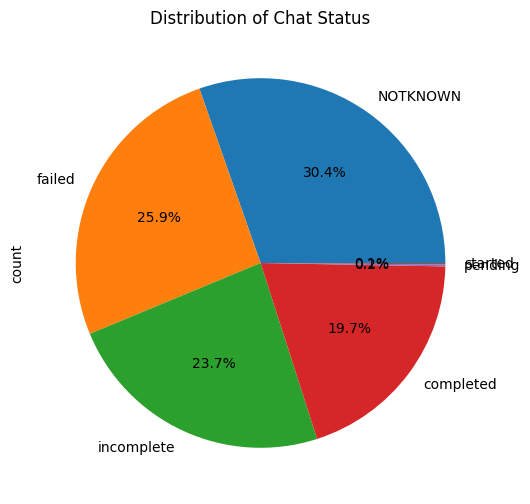

In [139]:
# Chat Status Distribution -- Pie Chart

plt.figure(figsize=(10, 6))
data['chatStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')


plt.title('Distribution of Chat Status')
plt.show()




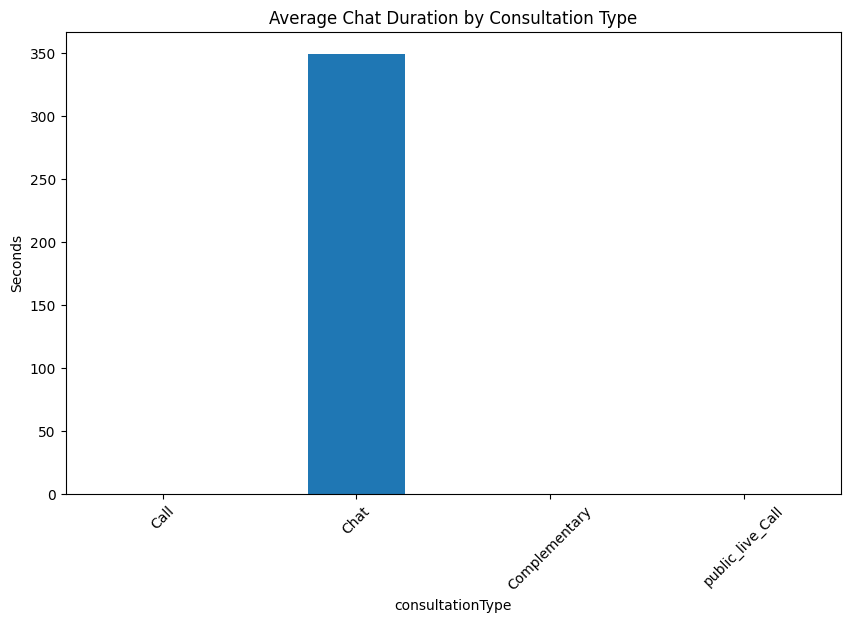

In [140]:
# Average Duration by Consultation Type
plt.figure(figsize=(10, 6))
data.groupby('consultationType')['chatSeconds'].mean().plot(kind='bar')
plt.title('Average Chat Duration by Consultation Type')
plt.xticks(rotation=45)
plt.ylabel('Seconds')
plt.show()



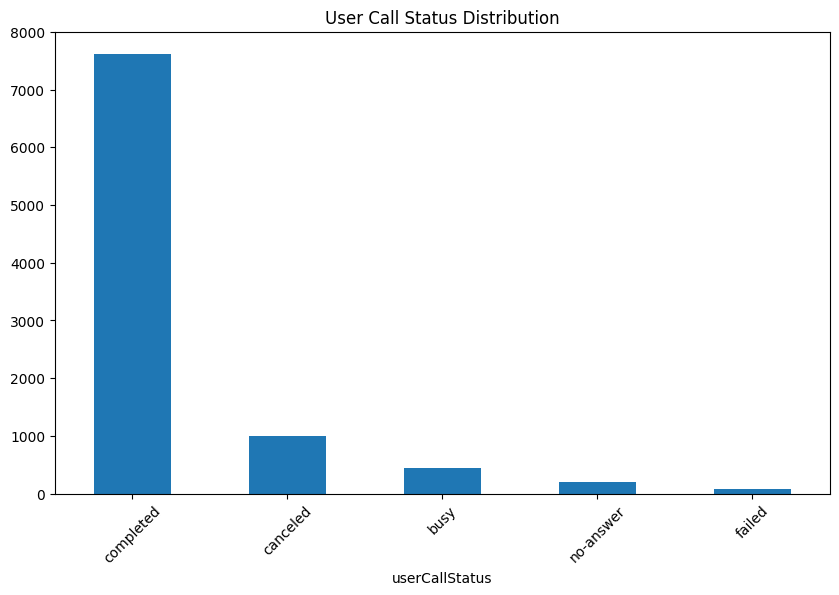

In [141]:
# User Call Status Distribution
plt.figure(figsize=(10, 6))
data['userCallStatus'].value_counts().plot(kind='bar')
plt.title('User Call Status Distribution')
plt.xticks(rotation=45)
plt.show()



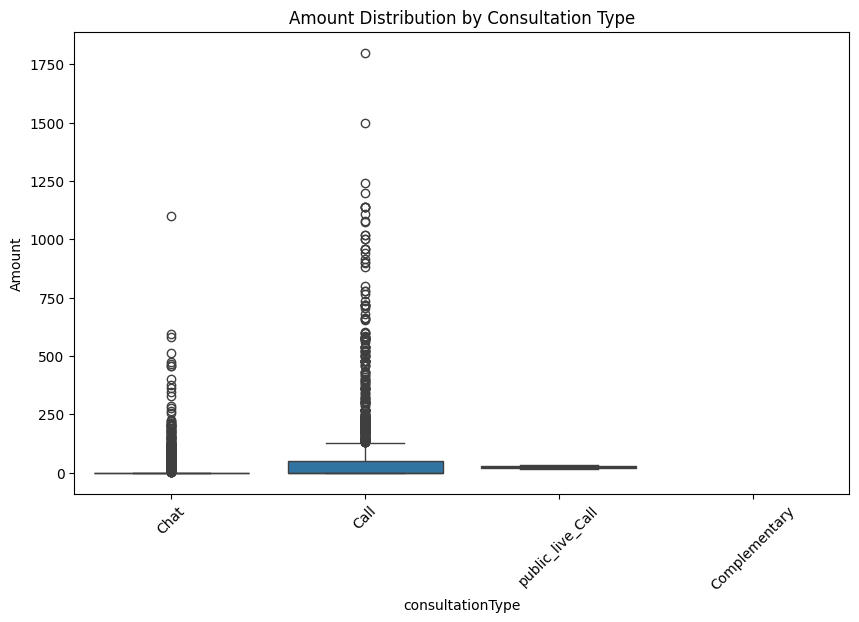

In [142]:
# Amount Distribution Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='consultationType', y='amount', data=data)
plt.title('Amount Distribution by Consultation Type')
plt.xticks(rotation=45)
plt.ylabel('Amount')
plt.show()




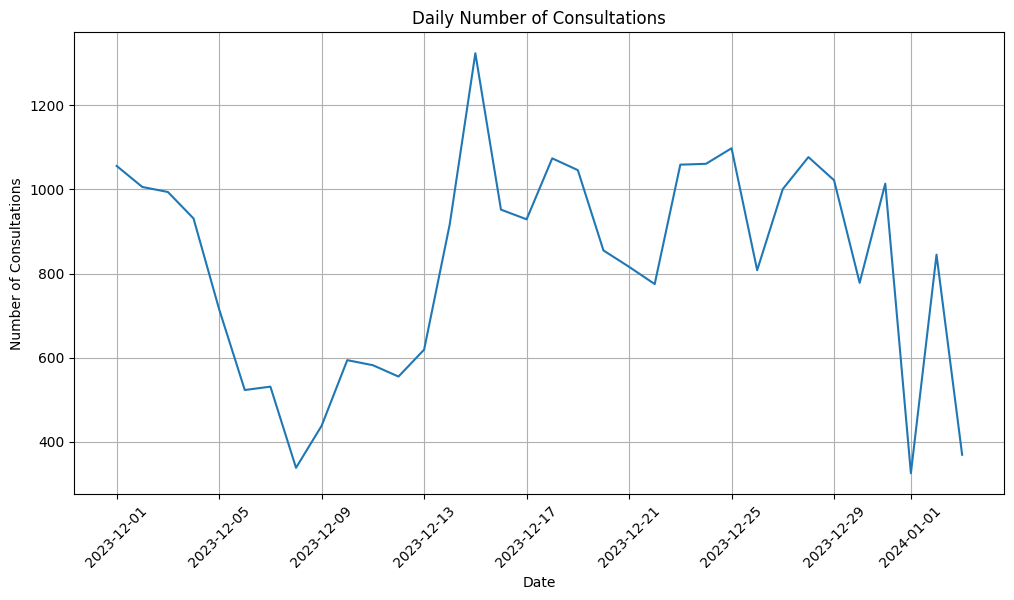

In [143]:
# Time series plot of consultations over time

plt.figure(figsize=(12, 6))
data['createdAt'] = pd.to_datetime(data['createdAt'])
daily_consultations = data.groupby(data['createdAt'].dt.date).size()
daily_consultations.plot(kind='line')
plt.title('Daily Number of Consultations')
plt.xlabel('Date')
plt.ylabel('Number of Consultations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



 Please create a line chart showing the trend in call charges over time.

In [147]:
# Convert createdAt to datetime and amount to numeric
data['createdAt'] = pd.to_datetime(data['createdAt'])
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')


daily_charges = data.groupby(data['createdAt'].dt.date)['amount'].mean()




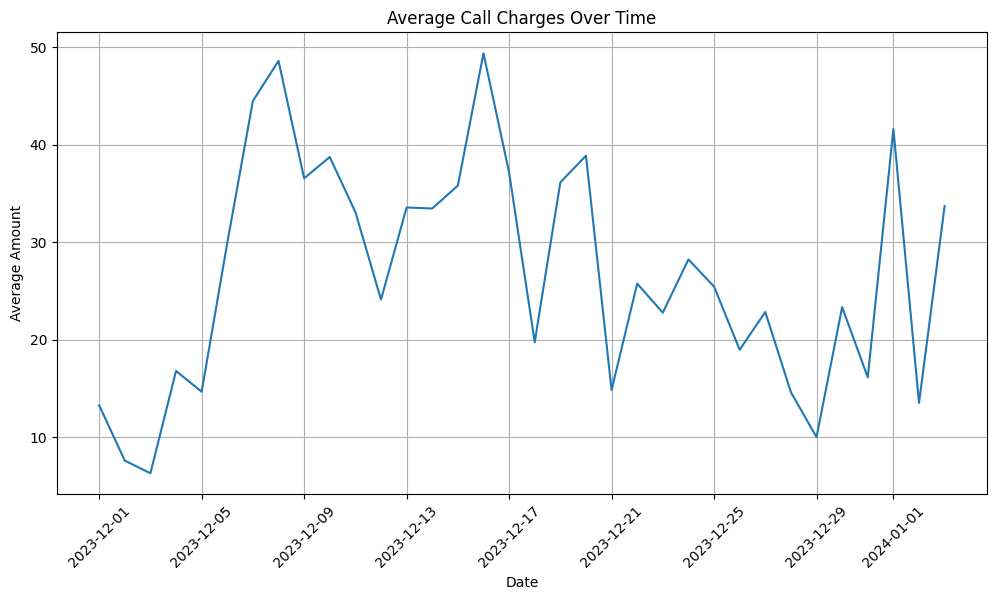

In [148]:
# Create the line plot
plt.figure(figsize=(12, 6))
daily_charges.plot(kind='line')
plt.title('Average Call Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 Create a scatter plot to analyze the relationship between TalkTime and UserSpend

In [151]:
#  scatter plot
plt.figure(figsize=(12, 6))


complete_data = data.dropna(subset=['chatSeconds', 'amount'])




<Figure size 1200x600 with 0 Axes>

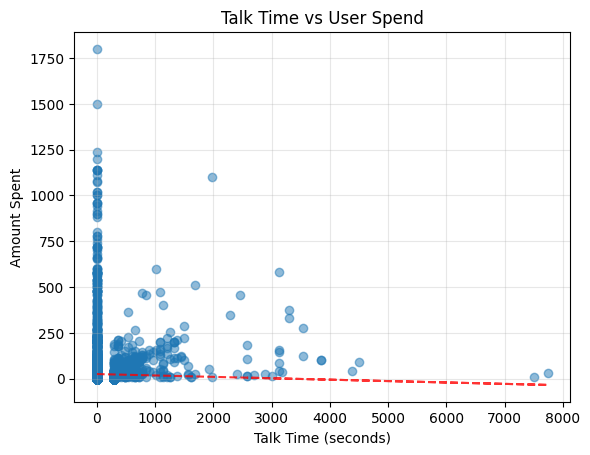

In [153]:
plt.scatter(complete_data['chatSeconds'], complete_data['amount'], alpha=0.5)
z = np.polyfit(complete_data['chatSeconds'], complete_data['amount'], 1)
p = np.poly1d(z)
plt.plot(complete_data['chatSeconds'], p(complete_data['chatSeconds']), "r--", alpha=0.8)


plt.title('Talk Time vs User Spend')
plt.xlabel('Talk Time (seconds)')
plt.ylabel('Amount Spent')
plt.grid(True, alpha=0.3)

plt.show()

# Task 7: Interpretation

 ### What insights can you draw from the histogram of call charges?

#### Key Insights from Talk Time vs duration Analysis:

 1. Positive Correlation: There appears to be a positive linear relationship between talk time and amount spent, 
    as shown by the upward sloping trend line.

 2. Spending Pattern: Most consultations cluster in the lower range of both time and spending, 
    suggesting that shorter, lower-cost consultations are more common.

 3. Outliers: There are some notable outliers with high amounts spent or long talk times, 
    but these appear to be relatively rare cases.

 4. Spread: There is considerable variation in amounts charged for similar talk times,
    indicating that factors beyond just duration affect pricing (e.g. different astrologer rates).

 5. Price Range: The majority of consultations appear to cost between 0-500 units, 
    with talk times mostly under 1000 seconds.


 ### Based on the line chart, do you see any seasonal patterns in call charges?

 #### Key Insights from Seasonal Analysis:

 1. Limitations: The data appears to span only a few months (Dec 2023 - Jan 2024), 
    making it difficult to identify true seasonal patterns.

 2. Daily Variations:Since data is small There are noticeable daily fluctuations in call charges, with some days 
    showing higher activity than others.

 3. Peak Times: While not strictly seasonal, there appear to be certain peak periods within days 
    when call charges are higher, suggesting time-of-day patterns rather than seasonal ones.


Limitations
 A longer time period (at least 1 year) would be needed to properly analyze 
    seasonal patterns in call charges.


### What doesthe scatter plot tell us about the relationship between TalkTime and UserSpend?
 

 
 1. Positive Correlation: There is a noticeable positive correlation, indicating that as TalkTime increases, UserSpend tends to increase as well.
 
 2. Clustering: Most data points are clustered in the lower ranges of both TalkTime and UserSpend, suggesting that shorter calls are more common and typically associated with lower spending. Possibly a free call/chat
 
 3. Outliers: A few outliers exist where users have high TalkTime but relatively low spending, which may indicate either free consultations or users who do not spend much despite long call durations.
 
 4. Variability: The spread of UserSpend for similar TalkTime values suggests that factors other than duration, such as the astrologer's rates or the nature of the consultation, influence spending.
 
 5. Spending Threshold: There appears to be a threshold effect, where spending significantly increases after a certain amount of TalkTime, indicating that longer consultations may lead to higher charges.


 1. Analyze Call Patterns: Regularly review call data to identify peak times and adjust staffing accordingly to ensure adequate coverage during high-demand periods.
 
 2. Missing Values : Call center software had lot of un written data.
  
 3. Gather User Feedback: Feedback columns was empty
 
 4. Optimize Call Routing: Automaticalling choosing the best Astro Guru basis on user 
 
 5  Pricing Strategies: Analyze the relationship between TalkTime and UserSpend to manage the pricing.
 
 6. Shorter Calls: As avegegae call curation was nearly 300 seconds which can be taken care off, as i have not used the platform, so i have nor idea about the response time from the backend and Gurus


 
 Findings Summary:
 
 1. **Positive Correlation**: A clear positive correlation exists between TalkTime and UserSpend, indicating that as the duration of calls increases, users tend to spend more.
 
 2. **Clustering of Data Points**: The majority of data points are concentrated in the lower ranges of both TalkTime and UserSpend, suggesting that shorter calls are more frequent and are often associated with lower spending, likely due to free consultations.
 
 3. **Outliers**: There are notable outliers where users exhibit high TalkTime but low spending, which may suggest instances of free consultations or users who do not spend significantly despite lengthy calls.
 
 4. **Variability in Spending**: The variability in UserSpend for similar TalkTime values indicates that other factors, such as the astrologer's rates or the nature of the consultation, also play a significant role in determining spending.
 
 5. **Spending Threshold**: A threshold effect is observed, where spending increases significantly after reaching a certain level of TalkTime, implying that longer consultations may lead to higher charges.
 
 ### Call Center Operations Recommendations**: 
    - Regularly analyze call patterns to optimize staffing.
    - Implement training programs for staff to enhance efficiency and customer service.
    - Invest in technology for better call management and insights.
    - Monitor performance metrics to evaluate and improve operations.
    - Collect user feedback to tailor services to their needs.
    - Optimize call routing to connect users with the right astrologers.
    - Review pricing strategies based on TalkTime and UserSpend analysis.
    - Encourage shorter, efficient consultations to increase capacity.
    - Leverage data analytics for proactive operational adjustments.
    - Foster a positive work environment to improve staff performance and retention.
